In [22]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Index(['vaccination', 'vaccine_doses', 'hospitalisation', 'full_recovery',
       'vaccination_status', 'covid_complications', 'kidney', 'heart_attack',
       'headache', 'fatigue', 'persistentcough1', 'anosmia1', 'ageusia1',
       'sob1', 'painfulbreathing', 'chestpain', 'palpitations', 'weightloss',
       'appetiteloss', 'abdominalpain', 'nausea_vomiting', 'constipation',
       'diarrhoea', 'micturition', 'hairloss', 'erectiledysfunction',
       'mestruation', 'balance', 'weakness_arms_legs', 'musclepain',
       'jointpain', 'movement', 'facelossensation', 'tingling', 'dizziness',
       'fainting', 'seizures', 'tremors', 'confusion', 'chewing_swallowin',
       'double_vision', 'speaking_communication', 'sleeping', 'rashes_lumps',
       'anxietydepression', 'pe', 'residence', 'education_level', 'doses',
       'headache_covid'],
      dtype='object')


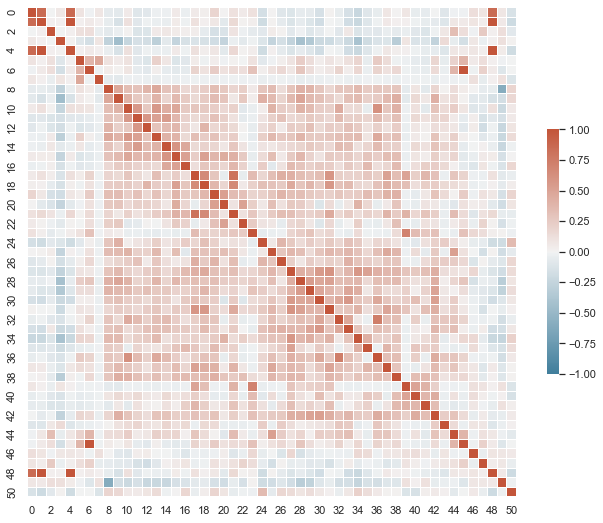

In [2]:
harvard_covid = pd.read_csv("../../data/01-modified-data/harvard_long_covid_cleaned.csv")
X = harvard_covid.loc[:, 'vaccination':'headache_covid'].astype('category')
y = harvard_covid['sex'].map({'male': 0, 'female': 1})
print(X.columns)

X = X.to_numpy()
y = y.to_numpy()

df=pd.DataFrame(np.hstack((X,y.reshape(y.shape[0],1))))
corr = df.corr()

#Display a correlation map: 
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True)     # Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Within the heatmap, we can see slight correlation between some of the symptoms, especially regarding those about vaccinations and chest/abdominal pain. Let's continue with the classification. 

In [3]:
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape        :",x_train.shape)
print("y_train.shape        :",y_train.shape)

print("X_test.shape     :",x_test.shape)
print("y_test.shape     :",y_test.shape)

x_train.shape        : (90, 50)
y_train.shape        : (90,)
X_test.shape     : (23, 50)
y_test.shape     : (23,)


In [4]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train,y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train, pos_label=1)])

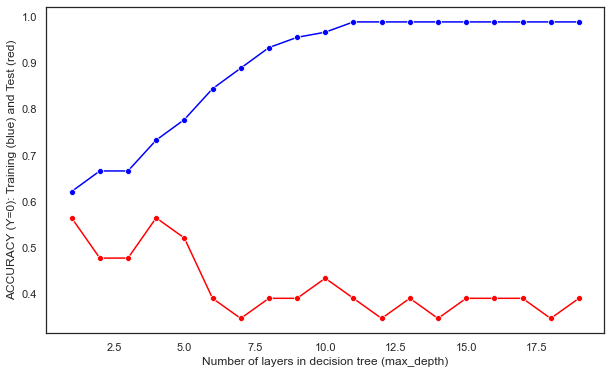

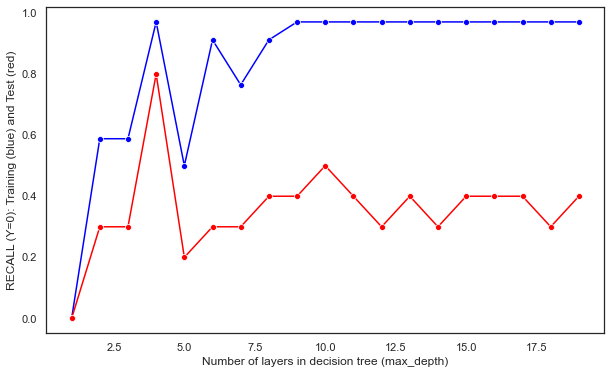

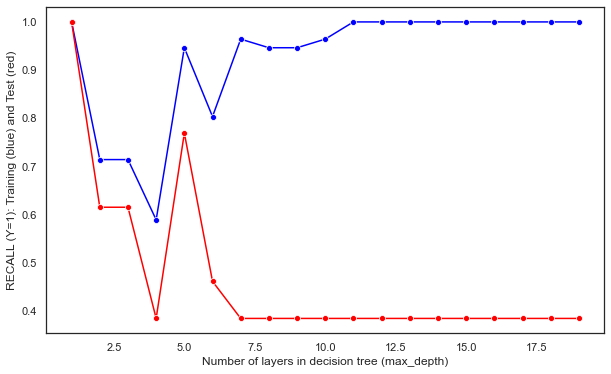

In [5]:
test_df = pd.DataFrame(test_results, columns=['num_layer', 'accuracy', 'recall_0', 'recall_1'])
train_df = pd.DataFrame(train_results, columns=['num_layer', 'accuracy', 'recall_0', 'recall_1'])

plt.figure(figsize=(10, 6))
p1 = sns.lineplot(x='num_layer', y='accuracy', data=train_df, color='blue', marker='o')
sns.lineplot(x='num_layer', y='accuracy', data=test_df, color='red',  marker='o', ax=p1)
p1.set_xlabel('Number of layers in decision tree (max_depth)')
p1.set_ylabel('ACCURACY (Y=0): Training (blue) and Test (red)')
plt.show()

plt.figure(figsize=(10, 6))
p2 = sns.lineplot(x='num_layer', y='recall_0', data=train_df, color='blue', marker='o')
sns.lineplot(x='num_layer', y='recall_0', data=test_df, color='red', marker='o', ax=p2)
p2.set_xlabel('Number of layers in decision tree (max_depth)')
p2.set_ylabel('RECALL (Y=0): Training (blue) and Test (red)')
plt.show()

plt.figure(figsize=(10, 6))
p3 = sns.lineplot(x='num_layer', y='recall_1', data=train_df, color='blue', marker='o')
sns.lineplot(x='num_layer', y='recall_1', data=test_df, color='red', marker='o', ax=p3)
p3.set_xlabel('Number of layers in decision tree (max_depth)')
p3.set_ylabel('RECALL (Y=1): Training (blue) and Test (red)')
plt.show()

In [13]:
model = tree.DecisionTreeClassifier(max_depth= 5)
model = model.fit(X,y)

print(harvard_covid.loc[:, 'vaccination':'headache_covid'].astype('category').columns)
model.feature_importances_

Index(['vaccination', 'vaccine_doses', 'hospitalisation', 'full_recovery',
       'vaccination_status', 'covid_complications', 'kidney', 'heart_attack',
       'headache', 'fatigue', 'persistentcough1', 'anosmia1', 'ageusia1',
       'sob1', 'painfulbreathing', 'chestpain', 'palpitations', 'weightloss',
       'appetiteloss', 'abdominalpain', 'nausea_vomiting', 'constipation',
       'diarrhoea', 'micturition', 'hairloss', 'erectiledysfunction',
       'mestruation', 'balance', 'weakness_arms_legs', 'musclepain',
       'jointpain', 'movement', 'facelossensation', 'tingling', 'dizziness',
       'fainting', 'seizures', 'tremors', 'confusion', 'chewing_swallowin',
       'double_vision', 'speaking_communication', 'sleeping', 'rashes_lumps',
       'anxietydepression', 'pe', 'residence', 'education_level', 'doses',
       'headache_covid'],
      dtype='object')


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09364006, 0.        ,
       0.        , 0.        , 0.10715982, 0.        , 0.        ,
       0.15435715, 0.        , 0.08907827, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.47043709,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0853276 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

Let's take a look at the Confusion Matrix as well as the decision tree. 

------TRAINING------
ACCURACY: 0.9888888888888889
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 0.9824561403508771
POSITIVE RECALL (Y=1): 0.9705882352941176
POSITIVE PRECISION (Y=1): 1.0
[[33  1]
 [ 0 56]]


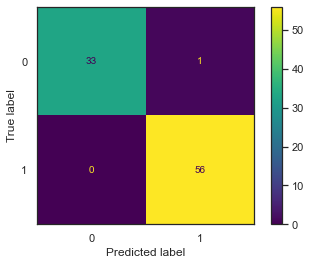

------TEST------
ACCURACY: 0.391304347826087
NEGATIVE RECALL (Y=0): 0.38461538461538464
NEGATIVE PRECISION (Y=0): 0.45454545454545453
POSITIVE RECALL (Y=1): 0.4
POSITIVE PRECISION (Y=1): 0.3333333333333333
[[4 6]
 [8 5]]


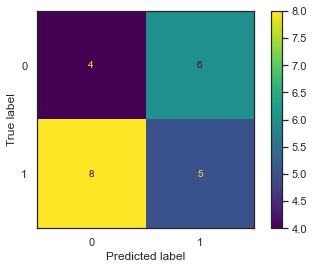

In [14]:
def confusion_plot(y_data, y_pred):

    cm = confusion_matrix(y_data, y_pred, labels= model.classes_)

    TP = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TN = cm[1,1]
    
    print('ACCURACY:',accuracy_score(y_data, y_pred))
    print('NEGATIVE RECALL (Y=0):', TN/(TN+FP))
    print('NEGATIVE PRECISION (Y=0):', TN/(TN+FN))
    print('POSITIVE RECALL (Y=1):', TP/(TP+FN))
    print('POSITIVE PRECISION (Y=1):', TP/(TP+FP))
    print(cm)

    #Plotting confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

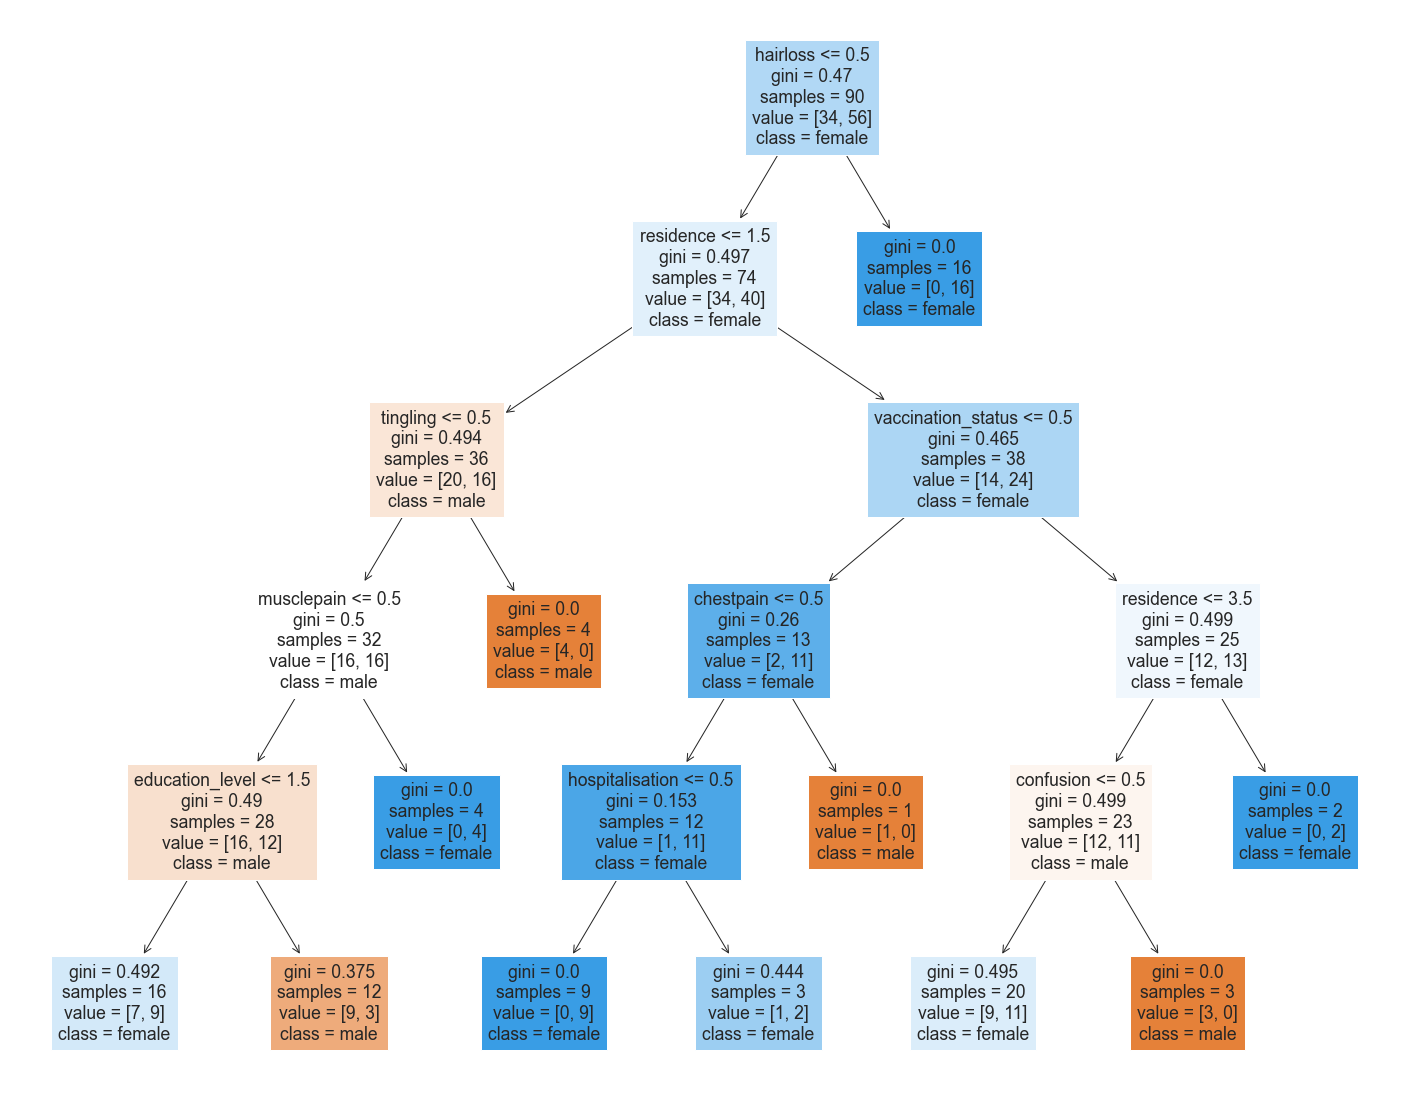

In [15]:
def plot_tree(model, X, Y):
    model = model.fit(x_train, y_train)
    
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=Y,
                   filled=True)

    plt.show()

X_df = harvard_covid.loc[:, 'vaccination':'headache_covid']
Y_df = list(harvard_covid['sex'].unique())

plot_tree(model, X_df, Y_df)

In [18]:
uk = pd.read_csv("../../data/01-modified-data/long_covid_uk_health_clean.csv")
uk.drop(columns=['lower_95_percent_confidence_limit', 'upper_95_percent_confidence_limit'], inplace=True)
uk = uk[uk['domain'] == 'Extent to which Long COVID reduces ability to undertake day-to-day activities']
uk.reset_index(inplace=True)
uk.drop(columns=['domain', 'Unnamed: 0', 'index'], inplace=True)
uk = uk.pivot(index='group',columns='symptom', values='estimate')
uk.reset_index(inplace=True)
uk.fillna(0, inplace=True)

def clean_column_names(df):
    df.columns = df.columns.str.strip()  # Remove leading and trailing whitespaces
    df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)  # Replace non-alphanumeric characters with underscores
    df.columns = df.columns.str.lower()  # Convert to lowercase for consistency
    return df

# Clean column names
uk = clean_column_names(uk)
uk.head()


symptom,group,abdominal_pain,allergies,chest_pain,cough,diarrhoea,difficulty_concentrating,ear_pain,eyesight,fever,...,palpitations,runny_nose_or_sneezing,shortness_of_breath,skin_rash_itch,sore_throat,tinnitus,trouble_sleeping,vertigo_or_dizziness,weakness_or_tiredness,worry_or_anxiety
0,A little,8.86,6.04,9.99,32.43,7.99,38.75,8.10,21.65,0.00,...,21.37,25.29,52.02,16.65,13.29,19.45,33.02,18.26,66.44,28.96
1,A lot,20.31,11.38,28.04,44.52,19.46,66.02,15.04,41.29,6.29,...,40.87,32.29,72.98,31.95,22.77,32.12,52.08,36.53,87.94,52.76
2,Not at all,2.29,2.43,3.07,24.66,2.93,9.29,2.64,8.36,0.00,...,8.65,15.94,18.30,6.93,6.58,11.29,13.01,6.08,21.80,9.51


In [16]:
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))

def confusion_plot(actual, pred):

    matrix = confusion_matrix(actual, pred)

    TP = matrix[0,0]
    FN = matrix[0,1]
    FP = matrix[1,0]
    TN = matrix[1,1]

    ACCURACY = (TP+TN)/(TP+FP+FN+TN)
    NEGATIVE_RECALL = TN/(TN+FP)
    NEGATIVE_PRECISION = TN/(TN+FN)
    POSITIVE_RECALL = TP/(TP+FN)
    POSITIVE_PRECISION = TP/(TP+FP)

    print('ACCURACY: ', ACCURACY)
    print('NEGATIVE RECALL (Y=0): ', NEGATIVE_RECALL)
    print('NEGATIVE PRECISION (Y=0): ', NEGATIVE_PRECISION)
    print('POSITIVE RECALL (Y=1): ', POSITIVE_RECALL)
    print('POSITIVE PRECISION (Y=1): ', POSITIVE_PRECISION)
    
    print(matrix)

    cm = confusion_matrix(actual, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

def plot_tree(model, X, Y, labels):
    model_X_Y = model.fit(X, Y)
    
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model_X_Y, 
                        feature_names=X.columns,
                        class_names=labels,
                        filled=True)

    plt.show()

Index(['abdominal_pain', 'allergies', 'chest_pain', 'cough', 'diarrhoea',
       'difficulty_concentrating', 'ear_pain', 'eyesight', 'fever',
       'general_pain', 'hair_loss', 'headache', 'joint_pain',
       'loss_of_appetite', 'loss_of_smell', 'loss_of_taste',
       'low_mood_or_not_enjoying', 'memory_loss_or_confusion', 'mobility',
       'muscle_ache', 'nasal_congestion', 'nausea_or_vomiting',
       'noisy_breathing__wheezing_', 'numbness', 'palpitations',
       'runny_nose_or_sneezing', 'shortness_of_breath', 'skin_rash_itch',
       'sore_throat', 'tinnitus', 'trouble_sleeping', 'vertigo_or_dizziness',
       'weakness_or_tiredness', 'worry_or_anxiety'],
      dtype='object', name='symptom')


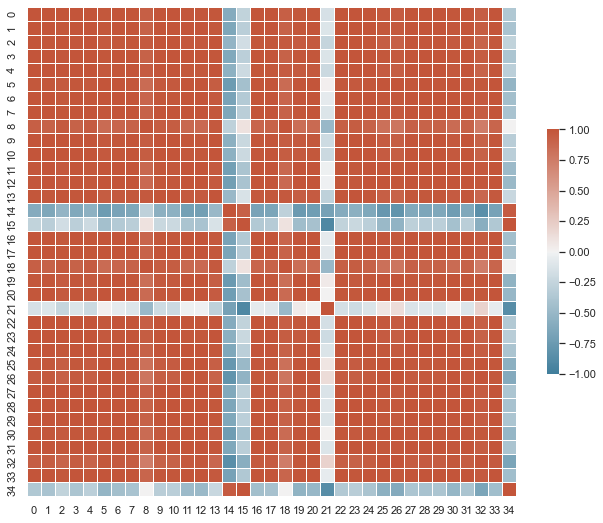

In [19]:
X = uk.loc[:, 'abdominal_pain':'worry_or_anxiety'].astype('category')
y = uk['group'].map({'A little': 0, 'A lot': 1, 'Not at all':2})
print(X.columns)

X = X.to_numpy()
y = y.to_numpy()

df=pd.DataFrame(np.hstack((X,y.reshape(y.shape[0],1))))
corr = df.corr()

#Display a correlation map: 
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True)     # Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()